# Actividad 02: Librerias y modelamiento básico

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales 2024-2
---
1. Una persona conduce una moto con rapidez constante $v_m$, mientras que un policia lo hace con aceleración constante $a_p$ (iniciando desde el reposo). Suponga que ambos movimientos inician en $t=0$, haga una gráfica para el movimiento de la moto y del policia, donde el usuario ingrese la velocidad (moto) y aceleración (policia). Además determine el instante $t$ en el cual se encuentran ambos. Ambos movimientos iniciarán en $x_i = 0$

**Pruebe**: para $v_m$ = 15m/s y $a_p$ = 3 m/s², el tiempo deberia ser 10 s


$$x_f = x_i + v_m\cdot t$$
$$x_f = x_i + v_o\cdot t + \frac{1}{2}a_p\cdot t^2$$
---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Ingrese la velocidad de la moto en m/s: 15
Ingrese la aceleración del policía en m/s²: 3
10.0


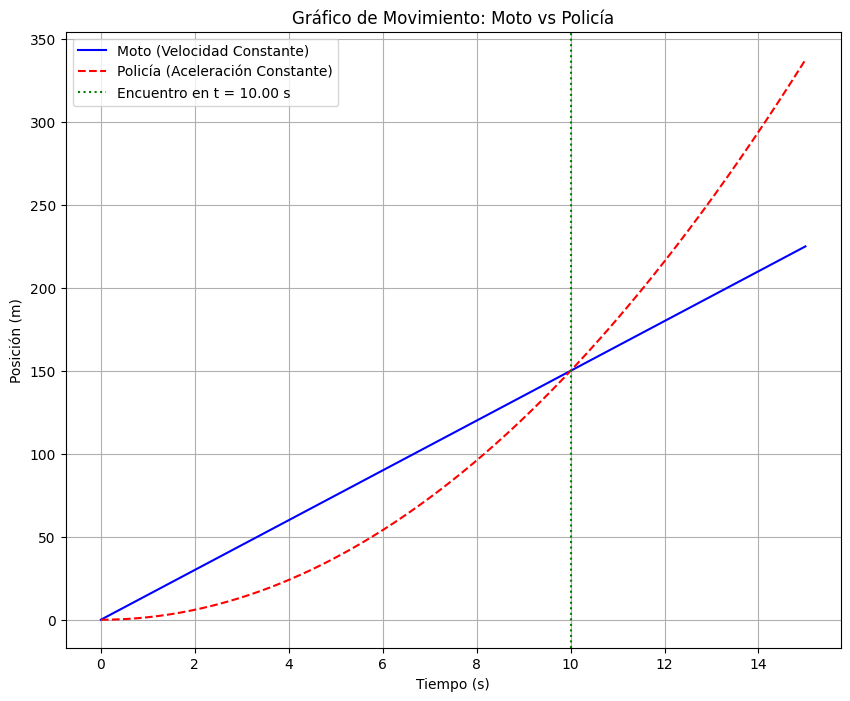

In [10]:


Vm = float(input("Ingrese la velocidad de la moto en m/s: "))
ap = float(input("Ingrese la aceleración del policía en m/s²: "))

te = 2 * (Vm / ap)
print(te)

t = np.linspace(0, te + 5, 500)
#calculamos las posiciones suponiendo que ambos partieron en cero

xm=Vm*t
xt=0.5*ap*(t**2)

# Graficar
plt.figure(figsize=(10, 8))
plt.plot(t, xm, label='Moto (Velocidad Constante)', color='blue')
plt.plot(t, xt, label='Policía (Aceleración Constante)', color='red', linestyle='--')


plt.title('Gráfico de Movimiento: Moto vs Policía')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición (m)')
plt.axvline(x=te, color='green', linestyle=':', label=f'Encuentro en t = {te:.2f} s')
plt.legend()
plt.grid(True)



2. El potencial Lennard-Jones es un modelo simple que aproxima la interacción entre un par de moléculas neutras. Este está definido como:

$$
V(r) = 4\epsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^{6} \right]
$$

Donde:
- $V(r)$ es el potencial en función de la distancia interatómica $r$.
- $\epsilon$ es la profundidad del pozo de potencial, es decir, la energía mínima que describe la interacción entre dos partículas.
- $\sigma$ es la distancia a la cual el potencial es cero, también conocido como el parámetro de distancia.
- $r$ es la distancia entre las dos partículas.

a. Escriba una función para encontrar modelar el potencial LJ.


b. Usando $\sigma = \epsilon = 1$ demuestre que la distancia de equilibrio $r_m$ es aproximadamente $r_m = 2^{1/16}\sigma$. Para esto realice un gráfico del potencial, especificando los ejes. Trunque la serie en $r_c = 2.5\sigma$.


c. Verifique que $r_m = 2^{1/16}\sigma$ se cumple para diferentes valores de $\sigma$, dejando $\epsilon$ constante.


R= 1.123246492985972 posicion 41


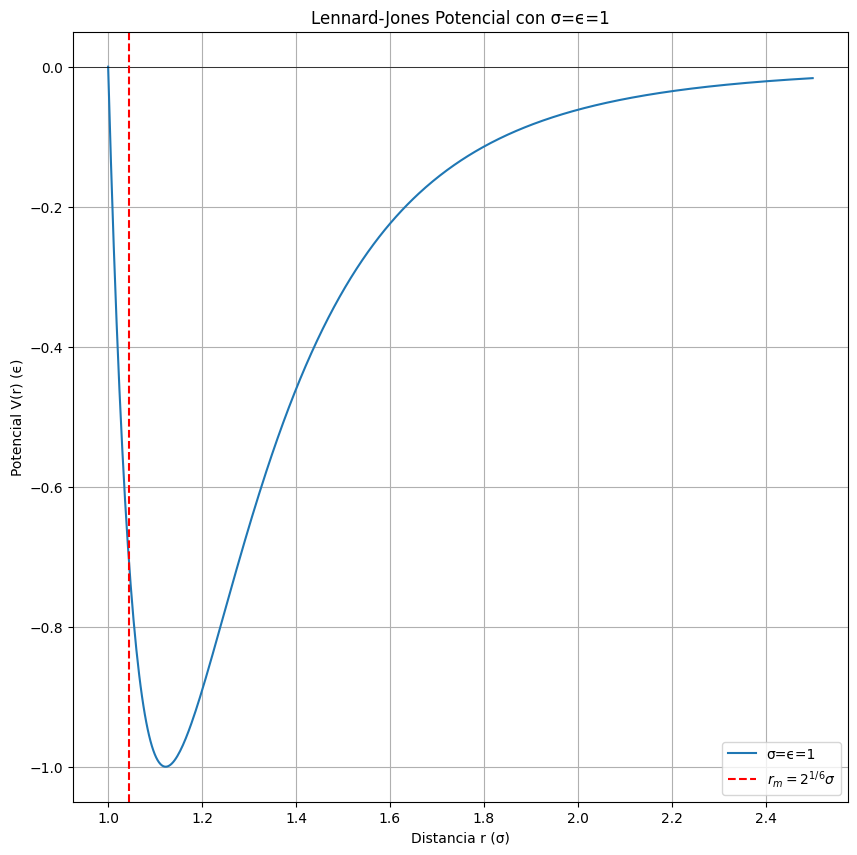

In [11]:
def lennard_jones_potential(r, epsilon, sigma):
    term1 = (sigma / r)**12
    term2 = (sigma / r)**6
    return 4 * epsilon * (term1 - term2)

# Define parameters
sigma = 1
epsilon = 1
rc = 2.5 * sigma
r_values = np.linspace(sigma, rc, 500)

# Calculate the potential for the defined range of r
potential_values = lennard_jones_potential(r_values, epsilon, sigma)
l=np.argmin(potential_values)
r_min=r_values[l]
print("R=",r_min,"posicion",l)
# Plot the potential
plt.figure(figsize=(10, 10))
plt.plot(r_values, potential_values, label=f'σ=ϵ=1')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(2**(1/16) * sigma, color='red', linestyle='--', label=r'$r_m=2^{1/6}\sigma$')
plt.xlabel('Distancia r (σ)')
plt.ylabel('Potencial V(r) (ϵ)')
plt.title('Lennard-Jones Potencial con σ=ϵ=1')
plt.legend()
plt.grid(True)
plt.show()




array([0.        , 1.12312312, 2.24624625, 3.36936937, 4.49249249])

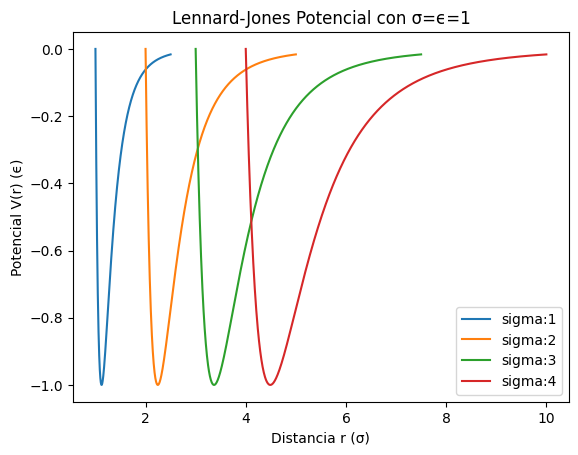

In [ ]:
minimos = np.zeros(5)
for i in range(1,len(minimos)):
  sigma = i
  rc = 2.5*sigma
  values = np.linspace(sigma, rc, 1000)
  potencial = lennard_jones_potential(values, epsilon, sigma)
  minimos_ = np.argmin(potencial)
  minimos[i] = values[minimos_]
  plt.plot(values,potencial, label = f'sigma:{i}')
  plt.xlabel('Distancia r (σ)')
  plt.ylabel('Potencial V(r) (ϵ)')
  plt.title('Lennard-Jones Potencial con σ=ϵ=1')

  plt.legend()


minimos

El siguiente código exporta tablas html de sitios web

In [ ]:
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[2]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]

El primer dataset muestra las alturas medias de niñ@s de 5, 10, 15 y 19 años.

a. Limpie los datos, eliminando columnas en (in) y cambie todos los nombres al español.

b. Realice un gráfico de barras, donde se muestre una comparación de la estatura media para niños y niñas en ambas categorias. Esto para los primeros 10 paises con mayor y menor altura, además agregue a Colombia.

c. ¿Existirá una relación entre la riqueza y la altura? Usando el dataset income, haga un merge con el dataset alturas. Ahora, empleando los datos de altura para los 10 mayores (19 años) y 10 menores (19 años). Realice un gráfico donde relacione la altura media con el GDP y concluya si existe alguna relación.

In [14]:
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"
html_content = pd.read_html(url)
alturas = html_content[2]
alturas

,Country,"Average Height, Boys, 19 yo (cm)",Girls 19 (cm),Boys 19 (in),Girls 19 (in),Boys 15 (cm),Girls 15 (cm),Boys 10 (cm),Girls 10 (cm),Boys 5 (cm),Girls 5 (cm)
0,Netherlands,183.78,170.36,6 ft.,5 ft. 7 in.,177.20,167.45,146.88,146.55,119.63,118.45
1,Montenegro,183.30,169.96,6 ft.,5 ft. 7 in.,177.50,167.42,146.81,146.33,119.58,118.49
2,Estonia,182.79,168.66,6 ft.,5 ft. 6 in.,176.41,166.12,146.03,145.21,116.94,115.74
3,Bosnia and Herzegovina,182.47,167.47,6 ft.,5 ft. 6 in.,174.21,164.85,144.97,144.55,118.32,116.38
4,Iceland,182.10,168.91,6 ft.,5 ft. 7 in.,174.80,165.61,145.59,145.06,118.49,116.48
...,...,...,...,...,...,...,...,...,...,...,...
191,Papua New Guinea,163.10,156.89,5 ft. 4 in.,5 ft. 2 in.,157.73,155.22,129.98,135.88,104.16,108.08
192,Solomon Islands,163.07,156.79,5 ft. 4 in.,5 ft. 2 in.,159.48,154.16,131.86,134.06,105.48,105.70
193,Laos,162.78,153.10,5 ft. 4 in.,5 ft.,159.43,152.80,131.95,134.20,105.91,106.63
194,Timor Leste,160.13,152.71,5 ft. 3 in.,5 ft.,154.15,150.11,125.94,131.02,99.62,103.98


In [15]:
print(list(alturas.columns))

['Country', 'Average Height, Boys, 19 yo (cm)', 'Girls 19 (cm)', 'Boys 19 (in)', 'Girls 19 (in)', 'Boys 15 (cm)', 'Girls 15 (cm)', 'Boys 10 (cm)', 'Girls 10 (cm)', 'Boys 5 (cm)', 'Girls 5 (cm)']


In [16]:
# a).
alturas.drop(['Boys 19 (in)', 'Girls 19 (in)'], axis=1, inplace = True) #Eliminar las columnas que están en (in)
alturas = alturas.rename(columns = {"Country": "País", "Average Height, Boys, 19 yo (cm)": "Niños 19 (cm)", "Girls 19 (cm)": "Niñas 19 (cm)" , "Boys 15 (cm)": "Niños 15 (cm)" , "Girls 15 (cm)": "Niñas 15 (cm)" , "Boys 10 (cm)": "Niños 10 (cm)", "Girls 10 (cm)": "Niñas 10 (cm)" , "Boys 5 (cm)": "Niños 5 (cm)" , "Girls 5 (cm)": "Niñas 5 (cm)"})

In [17]:
alturas

,País,Niños 19 (cm),Niñas 19 (cm),Niños 15 (cm),Niñas 15 (cm),Niños 10 (cm),Niñas 10 (cm),Niños 5 (cm),Niñas 5 (cm)
0,Netherlands,183.78,170.36,177.20,167.45,146.88,146.55,119.63,118.45
1,Montenegro,183.30,169.96,177.50,167.42,146.81,146.33,119.58,118.49
2,Estonia,182.79,168.66,176.41,166.12,146.03,145.21,116.94,115.74
3,Bosnia and Herzegovina,182.47,167.47,174.21,164.85,144.97,144.55,118.32,116.38
4,Iceland,182.10,168.91,174.80,165.61,145.59,145.06,118.49,116.48
...,...,...,...,...,...,...,...,...,...
191,Papua New Guinea,163.10,156.89,157.73,155.22,129.98,135.88,104.16,108.08
192,Solomon Islands,163.07,156.79,159.48,154.16,131.86,134.06,105.48,105.70
193,Laos,162.78,153.10,159.43,152.80,131.95,134.20,105.91,106.63
194,Timor Leste,160.13,152.71,154.15,150.11,125.94,131.02,99.62,103.98


B

In [18]:
mayores_b = alturas.nlargest(10, 'Niños 19 (cm)')
menores_b = alturas.nsmallest(10, 'Niños 19 (cm)')

mayores_g = alturas.nlargest(10, 'Niñas 19 (cm)')
menores_g = alturas.nsmallest(10, 'Niñas 19 (cm)')

colombia = alturas[alturas['País'] == 'Colombia']

may_g_Col = colombia.nlargest(10, 'Niñas 19 (cm)')
may_b_Col = colombia.nlargest(10, 'Niños 19 (cm)')

min_b_Col = colombia.nsmallest(10, 'Niños 19 (cm)')
min_g_Col = colombia.nsmallest(10, 'Niñas 19 (cm)')

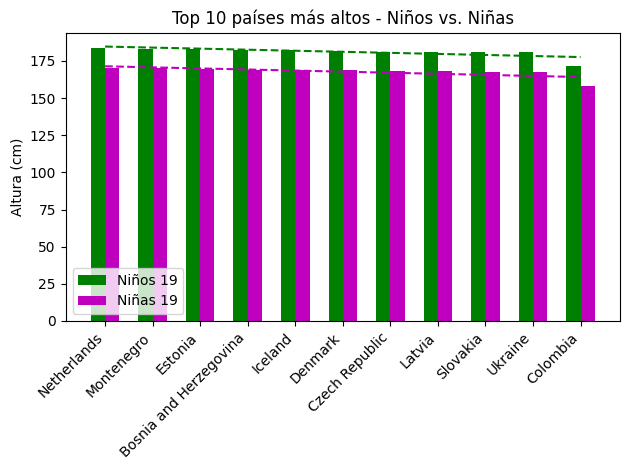

In [19]:
ninos = pd.concat([mayores_b['Niños 19 (cm)'], colombia['Niños 19 (cm)']])
ninas = pd.concat([mayores_g['Niñas 19 (cm)'], colombia['Niñas 19 (cm)']])
countries_labels = pd.concat([mayores_b['País'], colombia['País']])

x = np.arange(len(countries_labels))
width = 0.3  #ancho de barras

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ninos, width, label='Niños 19', color = 'g')
rects2 = ax.bar(x + width/2, ninas, width, label='Niñas 19', color = 'm')

ax.set_ylabel('Altura (cm)')
ax.set_title('Top 10 países más altos - Niños vs. Niñas')
ax.set_xticks(x)
ax.set_xticklabels(countries_labels, rotation=45, ha='right')
ax.legend()

z = np.polyfit(x, ninos, 1) #Línea de tendencia niños
p = np.poly1d(z)
plt.plot(x,p(x),"g--")

z = np.polyfit(x, ninas, 1) #Línea de tendencia niñas
p = np.poly1d(z)
plt.plot(x,p(x),"m--")

fig.tight_layout()
plt.show()

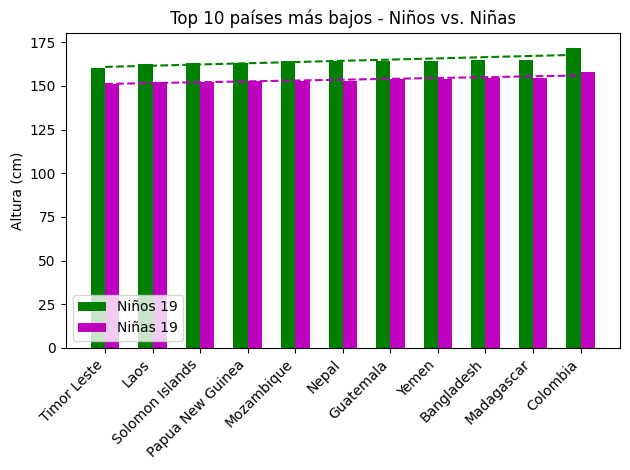

In [21]:
ninos = pd.concat([menores_b['Niños 19 (cm)'], colombia['Niños 19 (cm)']])
ninas = pd.concat([menores_g['Niñas 19 (cm)'], colombia['Niñas 19 (cm)']])
countries_labels = pd.concat([menores_b['País'], colombia['País']])

x = np.arange(len(countries_labels))
width = 0.3  #ancho de barras

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ninos, width, label='Niños 19', color = 'g')
rects2 = ax.bar(x + width/2, ninas, width, label='Niñas 19', color = 'm')

ax.set_ylabel('Altura (cm)')
ax.set_title('Top 10 países más bajos - Niños vs. Niñas')
ax.set_xticks(x)
ax.set_xticklabels(countries_labels, rotation=45, ha='right')
ax.legend()

z = np.polyfit(x, ninos, 1) #Línea de tendencia niños
p = np.poly1d(z)
plt.plot(x,p(x),"g--")

z = np.polyfit(x, ninas, 1) #Línea de tendencia niñas
p = np.poly1d(z)
plt.plot(x,p(x),"m--")

fig.tight_layout()
plt.show()

C

In [22]:
url_2 = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"
html_content_2 = pd.read_html(url_2)
income = html_content_2[0]
income

,Country,Total Wealth (billions USD),GDP per Adult (USD),Wealth per Adult (USD),Share of World Wealth
0,United States,"$145,793","$91,340","$579,051",31.45%
1,China,"$85,107","$15,765","$76,639",18.36%
2,Japan,"$25,692","$45,449","$245,238",5.54%
3,Germany,"$17,489","$59,423","$256,985",3.77%
4,United Kingdom,"$16,261","$59,377","$309,375",3.51%
...,...,...,...,...,...
211,Anguilla,NaN,"$26,510",NaN,-
212,Cook Islands,NaN,"$26,438",NaN,-
213,Nauru,NaN,"$23,398",NaN,-
214,Tuvalu,NaN,"$7,780",NaN,-


In [25]:
income = income.rename(columns = {'Country':'País', 'Total Wealth (billions USD)' : 'Riqueza total (USD)' , 'GDP per Adult (USD)' : 'PIB por adulto (USD)', 'Wealth per Adult (USD)' : 'Riqueza por adulto (USD)', '	Share of World Wealth' : 'Participación de la riqueza mundial'})
income

,País,Riqueza total (USD),PIB por adulto (USD),Riqueza por adulto (USD),Share of World Wealth
0,United States,"$145,793","$91,340","$579,051",31.45%
1,China,"$85,107","$15,765","$76,639",18.36%
2,Japan,"$25,692","$45,449","$245,238",5.54%
3,Germany,"$17,489","$59,423","$256,985",3.77%
4,United Kingdom,"$16,261","$59,377","$309,375",3.51%
...,...,...,...,...,...
211,Anguilla,NaN,"$26,510",NaN,-
212,Cook Islands,NaN,"$26,438",NaN,-
213,Nauru,NaN,"$23,398",NaN,-
214,Tuvalu,NaN,"$7,780",NaN,-


In [26]:
data = income.merge(alturas, how='inner', on='País')
data

,País,Riqueza total (USD),PIB por adulto (USD),Riqueza por adulto (USD),Share of World Wealth,Niños 19 (cm),Niñas 19 (cm),Niños 15 (cm),Niñas 15 (cm),Niños 10 (cm),Niñas 10 (cm),Niños 5 (cm),Niñas 5 (cm)
0,China,"$85,107","$15,765","$76,639",18.36%,175.66,163.46,171.23,162.44,141.87,143.40,113.41,114.91
1,Japan,"$25,692","$45,449","$245,238",5.54%,172.06,158.50,168.80,158.08,139.06,139.68,109.84,109.28
2,Germany,"$17,489","$59,423","$256,985",3.77%,180.28,166.18,174.65,164.70,144.36,143.95,114.76,113.34
3,United Kingdom,"$16,261","$59,377","$309,375",3.51%,178.21,163.94,172.44,162.92,142.39,142.58,112.54,111.73
4,France,"$16,159","$56,125","$322,074",3.49%,178.60,164.49,173.15,163.76,143.00,142.83,114.65,113.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Marshall Islands,NaN,"$6,693",NaN,-,165.26,154.76,160.38,154.50,132.78,136.59,106.98,109.10
188,Palau,NaN,"$19,451",NaN,-,170.62,159.52,167.60,159.53,140.11,141.43,114.08,113.47
189,Cook Islands,NaN,"$26,438",NaN,-,178.32,167.31,174.00,166.21,145.74,146.12,119.25,117.87
190,Nauru,NaN,"$23,398",NaN,-,169.57,157.82,166.63,157.12,139.30,138.40,113.42,110.69


In [27]:
merge = data.loc[:, ['País', 'PIB por adulto (USD)', 'Niñas 19 (cm)']]
merge

,País,PIB por adulto (USD),Niñas 19 (cm)
0,China,"$15,765",163.46
1,Japan,"$45,449",158.50
2,Germany,"$59,423",166.18
3,United Kingdom,"$59,377",163.94
4,France,"$56,125",164.49
...,...,...,...
187,Marshall Islands,"$6,693",154.76
188,Palau,"$19,451",159.52
189,Cook Islands,"$26,438",167.31
190,Nauru,"$23,398",157.82


In [28]:
merge['PIB por adulto (USD)'] = merge['PIB por adulto (USD)'].str.replace('$', '').str.replace(',', '').astype(int)
merge

,País,PIB por adulto (USD),Niñas 19 (cm)
0,China,15765,163.46
1,Japan,45449,158.50
2,Germany,59423,166.18
3,United Kingdom,59377,163.94
4,France,56125,164.49
...,...,...,...
187,Marshall Islands,6693,154.76
188,Palau,19451,159.52
189,Cook Islands,26438,167.31
190,Nauru,23398,157.82


In [29]:
pib_list = []
merge_ordered = menores_g.sort_values('Niñas 19 (cm)', ascending=True)[['País', 'Niñas 19 (cm)']]
paises_lista = merge_ordered['País'].tolist() # Lista para tomar etiquetas para gráfica
for pais in merge_ordered['País'].tolist():
    pib = merge[merge['País'] == pais]['PIB por adulto (USD)'].iloc[0]
    pib_list.append(pib)
merge_ordered['PIB por adulto (USD)'] = pib_list
merge_ordered

,País,Niñas 19 (cm),PIB por adulto (USD)
189,Guatemala,150.91,8198
186,Bangladesh,152.38,3333
188,Nepal,152.39,1812
194,Timor Leste,152.71,3336
185,Madagascar,153.06,990
193,Laos,153.10,4364
184,Philippines,154.14,5580
164,Maldives,154.28,12473
177,Indonesia,154.36,6472
172,Peru,154.39,9761


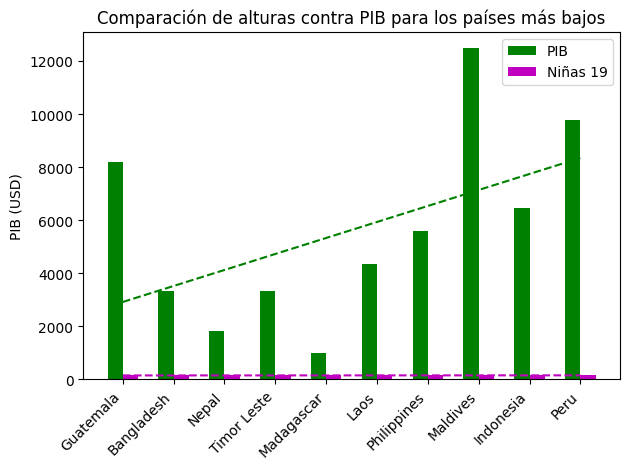

In [30]:
countries_labels = paises_lista
new_df = merge_ordered
ninas = new_df['Niñas 19 (cm)']

x = np.arange(len(paises_lista))
y = new_df['PIB por adulto (USD)']
width = 0.3  #ancho de barras

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, new_df['PIB por adulto (USD)'], width, label='PIB', color = 'g')
rects2 = ax.bar(x + width/2, ninas, width, label='Niñas 19', color = 'm')

ax.set_ylabel('PIB (USD)')
ax.set_title('Comparación de alturas contra PIB para los países más bajos')
ax.set_xticks(x)
ax.set_xticklabels(countries_labels, rotation=45, ha='right')
ax.legend()

z = np.polyfit(x, new_df['Niñas 19 (cm)'], 1) #Línea de tendencia niños
p = np.poly1d(z)
plt.plot(x,p(x),"m--")

z = np.polyfit(x, new_df['PIB por adulto (USD)'], 1) #Línea de tendencia PIB
p = np.poly1d(z)
plt.plot(x,p(x),"g--")

fig.tight_layout()
plt.show()

Según la gráfica, podría existir una relación entre la altura de los niños y el PIB, pues al ordenar los países en orden ascendente según su altura, tomando los 10 países con alturas más bajas, se observa una línea de tendencia del PIB que aumenta del mismo modo que la altura. Puede tener bastante dispersión la distribución respecto al ajuste lineal de la línea de tendencia, pero tomándolo a estos grandes rasgos, puede que sí aumente el PIB conforme aumenta la altura promedio de los niños del país.